In [2]:
import pandas as pd
import sklearn.preprocessing as pre
import sklearn.metrics as met
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from warnings import filterwarnings
filterwarnings("ignore")
sns.set()

In [3]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.drop(columns="Id", inplace=True)

# ONE HOT ENCODING

In [5]:
category = pd.get_dummies(data["Species"])
data_baru = pd.concat([data, category], axis=1)
data_baru = data_baru.drop(columns='Species')
data_baru

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [6]:
dataset = data_baru.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [7]:
X = dataset[:, 0:4]
y = dataset[:, 4:]

# NORMALISASI

In [8]:
min_max = pre.MinMaxScaler()
X = min_max.fit_transform(X)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
# Activation pilih softmax, karena untuk klasifikasi multi kelas
# Fungsi Dropout adalah untuk mencegah overfitting model
model = Sequential([    
                    Dense(32, activation='relu', input_shape=(4,)),
                    Dropout(0.2),
                    Dense(32, activation='relu'),
                    Dropout(0.5),
                    Dense(3, activation='softmax')
])

In [12]:
# Pada loss pilih categorical_crossentropy, karena untuk klasifikasi multi kelas
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# MEMBUAT CALLBACK

In [13]:
# Fungsi untuk menghentikan Epoch (Menghemat waktu proses training) ketika mencapai 90%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True
callbacks = myCallback()

In [14]:
# Buat variabel agar bisa di plot
# Ketika parameter callbacks di panggil maka tidak akan muncul di plot, karena menghemat waktu 
# jadi tidak ada ilustrasi
# hist = model.fit(X_train, y_train, epochs=100, callbacks=[callbacks])
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1474 - accuracy: 0.3524
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1344 - accuracy: 0.3714
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1070 - accuracy: 0.3810
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0797 - accuracy: 0.4952
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0841 - accuracy: 0.4381
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0484 - accuracy: 0.4762
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0728 - accuracy: 0.4095
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0572 - accuracy: 0.4857
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0220 - accuracy: 0.5619
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0204 - accuracy: 0.5524
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8762
Epoch 85/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8476
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8476
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.9048
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8381
Epoch 89/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8095
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8571
Epoch 91/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8000
Epoch 92/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8667
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8095
Epoch 94/100
4/4 [===============

In [15]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.9556


[0.2975776791572571, 0.9555555582046509]

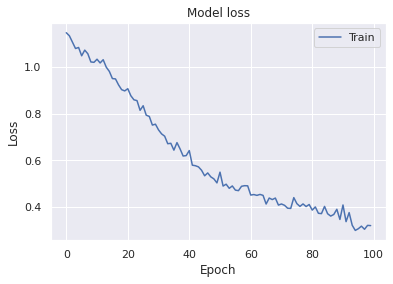

In [16]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

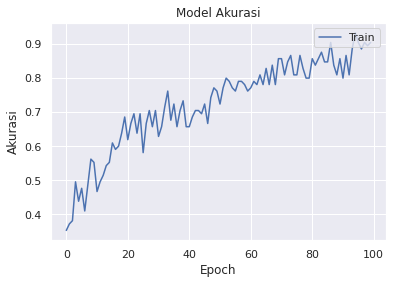

In [17]:
plt.plot(hist.history['accuracy'])
plt.title('Model Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [18]:
# b = X_test[1].reshape(1,-1)
# a = model.predict(b)
y_pred = model.predict(X_test)
print(y_pred)

2/2 [==============================] - 0s 2ms/step
[[1.7370719e-03 5.3268528e-01 4.6557769e-01]
 [1.6112061e-02 7.4205053e-01 2.4183734e-01]
 [3.1426412e-03 5.8254534e-01 4.1431195e-01]
 [1.4386892e-04 2.5678843e-01 7.4306762e-01]
 [1.8206502e-03 4.9510422e-01 5.0307512e-01]
 [9.9863392e-01 1.2990162e-03 6.7013782e-05]
 [9.9160218e-01 7.8519797e-03 5.4589502e-04]
 [9.9275136e-01 6.7707570e-03 4.7792599e-04]
 [3.6250225e-03 6.1051708e-01 3.8585791e-01]
 [2.7467879e-03 5.2888775e-01 4.6836540e-01]
 [3.3354588e-04 3.6304581e-01 6.3662058e-01]
 [8.6141396e-03 7.1754456e-01 2.7384135e-01]
 [9.6485103e-03 6.8956703e-01 3.0078444e-01]
 [9.9953550e-01 4.4808030e-04 1.6378690e-05]
 [2.7372423e-04 2.9031315e-01 7.0941311e-01]
 [9.9896550e-01 9.8878995e-04 4.5648514e-05]
 [1.5402227e-04 2.6884162e-01 7.3100430e-01]
 [9.9661535e-01 3.1766158e-03 2.0794514e-04]
 [9.9875963e-01 1.1790737e-03 6.1337159e-05]
 [4.7698102e-04 3.6194381e-01 6.3757914e-01]
 [9.9781370e-01 2.0621717e-03 1.2412544e-04]
 [2.

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1,
       1])

In [20]:
# z = y_test[1].reshape(1,-1)
# np.argmax(z, axis=1)
np.argmax(y_test, axis=1)

array([2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1,
       1])

In [21]:
model = met.confusion_matrix(np.argmax(y_test, axis=1), y_pred)
model

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  2, 17]])

In [67]:
y_test

array([0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2,
       0])